# Getting started with pygplates

To run these tutorials, you'll need the pygplates module to be available within your notebook. For instructions on how to set up pygplates on your own machine, please see the pygplates [html documentation](https://www.gplates.org/docs/pygplates/pygplates_getting_started.html#installation).

To test that the pygplates module is correctly installed and available within this notebook, try running the next cell (an error message will appear if pygplates fails to load). 


In [3]:
import pygplates

## Importing files

To use pygplates, we need to first load up some files (rotation file, etc.). We can also define things (e.g. points) within the notebook itself.

The function `pygplates.reconstruct` takes the rotation file, and a point feature constructed from the user-defined values, then determines their reconstructed coordinates using the rotation model and prints them out.


In [4]:
# Names of input rotation file
input_rotation_filename = 'Data/Muller2019-Young2019-Cao2020_CombinedRotations.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 40.
anchor_plate = 0

# Define a list of (lat,long,plateid) for each point we want to reconstruct.
# Note that LAT is first here...
points = []
points.append((-33.8., 151.2, ,801))   # Sydney
points.append((-37.8., 1445., 801))    # Melbourne

# cookie cut instead?
# # Define a list of (lat,long,plateid) for each point we want to reconstruct 
# points = []
# points.append((-33.8.,151.2.,801))
# points.append((-30.,120.,801))

point_features = []
for lat, lon, plate_id in points:
    point_feature = pygplates.Feature()
    point_feature.set_geometry(pygplates.PointOnSphere(lat, lon))
    point_feature.set_reconstruction_plate_id(plate_id)
    point_features.append(point_feature)
    
# Reconstruct the point features.
reconstructed_feature_geometries = []
pygplates.reconstruct(point_features, input_rotation_filename, 
                      reconstructed_feature_geometries, reconstruction_time)
    
# Each reconstructed geometry should be a point - return a list of all reconstructed points.
for reconstructed_feature_geometry in reconstructed_feature_geometries:
    print('Coordinates of the reconstructed point:', \
        reconstructed_feature_geometry.get_reconstructed_geometry().to_lat_lon() )


Coordinates of the reconstructed point: (-50.774052377724466, 91.90222590723023)
Coordinates of the reconstructed point: (-51.59417612440113, 105.67271812079484)


### pygplates

The next example, performs a task that should be easy to comprehend if you are familiar with the GPlates desktop software. The 'pygplates.reconstruct' function takes a feature collection and reconstructs it to a certain time, based on a given rotation file, reconstruction time, and anchor plate ID. The example below uses the coastlines and rotation file from the GPlates sample data (which you'll already have somewhere on your machine if you already have regular GPlates). The output is saved to a file whose format can be any of the GPlates supported export types (e.g. gpml, GMT, esri shapefile).

In [25]:
# Names of input files
input_feature_filename = 'Data/Global_EarthByte_GPlates_PresentDay_Coastlines.gpmlz'
input_rotation_filename = 'Data/Muller2019-Young2019-Cao2020_CombinedRotations.rot'

# Input parameters to define how the reconstruction is made
reconstruction_time = 120.6
anchor_plate = 0

# Name of ouput file
output_reconstructed_feature_filename = '/tmp/tmp.shp'

# Use pygplates to carry out the reconstruction 
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, 
                      reconstruction_time, anchor_plate)


The result of this command should be a reconstructed shapefile, saved within the same folder as the notebook, ready for use with any GIS software. 

If the python `cartopy` module is available, we can also plot it within the notebook as follows:

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import cartopy.feature as cfeature
import numpy as np
%matplotlib inline

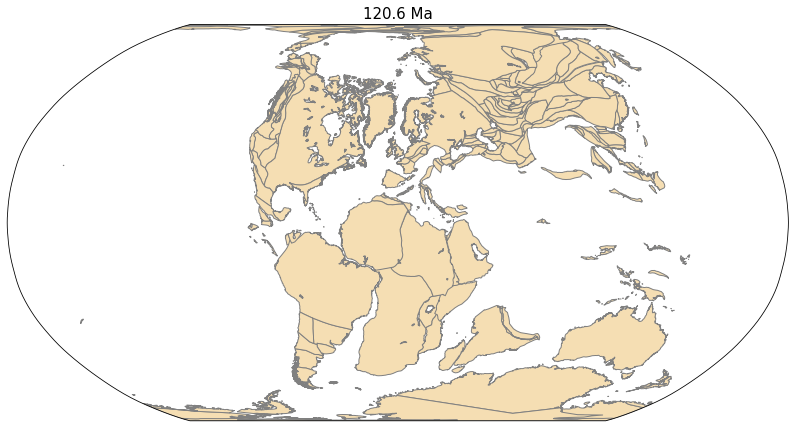

In [26]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())

shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())

ax.add_feature(ft_coast, facecolor='Wheat', edgecolor='Grey')
plt.title('%s Ma' % reconstruction_time, fontsize=15)

plt.show()

Try changing the anchor plate from the default value (which is 0, effectively the absolute reference frame) to 801 (fixing Australia, and reconstructing all other geometries relative to this). The cell below repeats the previous reconstruction with this one modifications, and plots. 

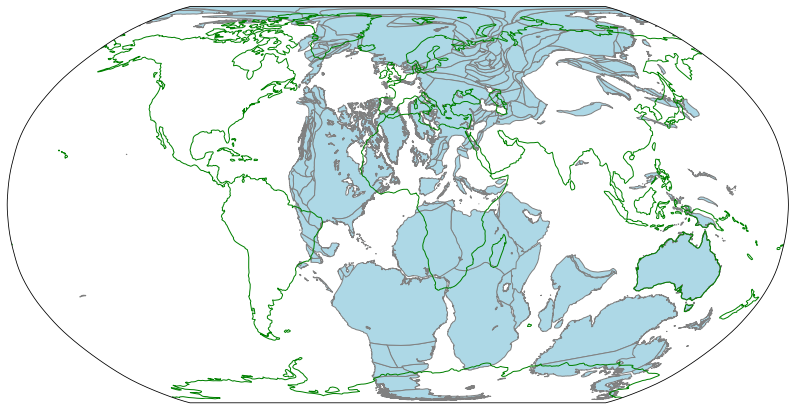

In [24]:
anchor_plate = 801
pygplates.reconstruct(input_feature_filename, input_rotation_filename, 
                      output_reconstructed_feature_filename, reconstruction_time, anchor_plate)


fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection=ccrs.Robinson())

shp_coast = shpreader.Reader(output_reconstructed_feature_filename)
ft_coast = cfeature.ShapelyFeature(shp_coast.geometries(), crs=ccrs.PlateCarree())

ax.add_feature(ft_coast, facecolor='LightBlue', edgecolor='Grey')
ax.coastlines(color='g')  # plot present-day coastlines

## 